<a href="https://colab.research.google.com/github/fedhere/RubinRhapsodies/blob/main/Sid's_copy_of_rubin_rhapsodies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rubin Rhapsodies $^{TM}$

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
import pandas as pd

In [ ]:
plt.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


## Data Import

In [ ]:
cd gdrive/My\ Drive/

In [ ]:
!mkdir rubin_rhapsodies

In [ ]:
cd rubin_rhapsodies/

In [ ]:
!wget https://zenodo.org/record/2539456/files/plasticc_train_metadata.csv.gz

In [ ]:
!wget https://zenodo.org/record/2539456/files/plasticc_train_lightcurves.csv.gz

In [ ]:
!mkdir data

In [ ]:
!mv plasticc* data

In [ ]:
ls data

In [ ]:
lcvs = pd.read_csv("data/plasticc_train_lightcurves.csv.gz")
lcvs.head()

,object_id,mjd,passband,flux,flux_err,detected_bool
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


In [ ]:
metadata = pd.read_csv("data/plasticc_train_metadata.csv.gz")
metadata.head()

,object_id,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,true_target,true_submodel,true_z,true_distmod,true_lensdmu,true_vpec,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
0,615,349.0461,-61.9438,1,0.000,0.000,0.000,-9.000,0.017,92,92,1,0.000,0.000,0.000,0.0,0.0,0.0,59570.000,69,484.7,3286.7,3214.1,3039.7,2854.5,2837.0
1,713,53.0859,-27.7844,1,1.818,1.627,0.255,45.406,0.007,88,88,1,1.817,45.703,0.000,0.0,0.0,0.0,59570.000,34,108.7,117.7,119.9,149.6,147.9,150.5
2,730,33.5742,-6.5796,1,0.232,0.226,0.016,40.256,0.021,42,42,2,0.233,40.328,0.004,4.5,0.0,0.0,60444.379,9,0.0,0.0,0.0,0.0,0.0,0.0
3,745,0.1899,-45.5867,1,0.304,0.281,1.152,40.795,0.007,90,90,1,0.301,40.969,-0.004,257.7,0.0,0.0,60130.453,38,0.0,0.0,0.0,0.0,0.0,0.0
4,1124,352.7113,-63.8237,1,0.193,0.241,0.018,40.417,0.024,90,90,1,0.193,39.866,-0.002,-368.8,0.0,0.0,60452.641,1,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
bands = lcvs["passband"].unique()
print("Passbands (filter) identifiers:", bands)
#Played with using functions from pandas, seeing how to read csv into python
metaTarget = metadata["target"].unique()
print("Unique Object Type:", metaTarget)

Passbands (filter) identifiers: [2 1 3 4 5 0]
Unique Object Type: [92 88 42 90 65 16 67 95 62 15 52  6 64 53]


In [ ]:
objects = lcvs["object_id"].unique()
print("There are {} astrophysical simulated objects in my dataset".format(objects.shape[0]))

## Visualization

In [ ]:
# preparing a normalization to pass to the color map to map red filters to red blue filters to blue
norm_band = Normalize(vmin=bands.min(), vmax=bands.max())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  

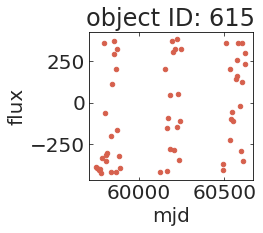

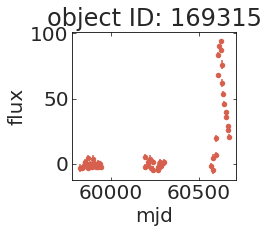

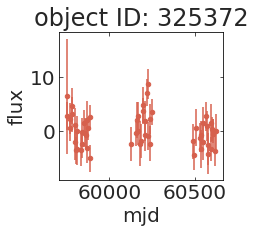

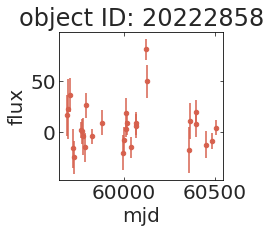

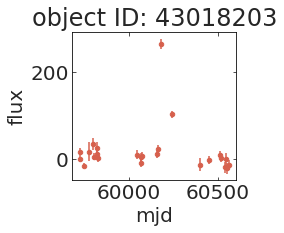

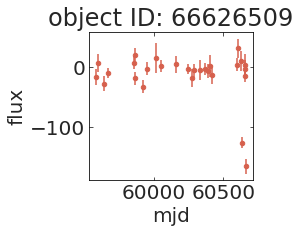

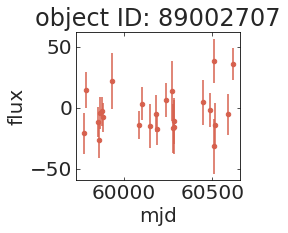

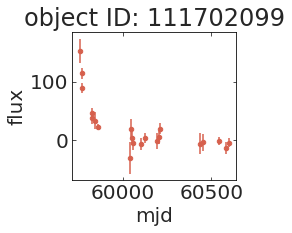

In [ ]:
#Plotting every 1000th object
for obj in objects[::1000]:
    ax = plt.figure().add_subplot(231)
    for band in bands:
      #Uncomment below if you want plot in just the z passband: u,g,r,i,z,y = 0,1,2,3,4,5 ; z = 4
      # if band == 4:
        lcvs[lcvs.object_id == obj][lcvs.passband == band].plot(x="mjd", 
                                            y="flux", yerr="flux_err", ax=ax, kind="scatter", 
                                                                color=plt.cm.RdBu_r(norm_band(band)))
    plt.title("object ID: %d"%obj)